In [1]:
#let's look at at the State of the State adddresses from 2017 Governors

In [183]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [184]:
#filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
#emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
#emolex_df.head()

In [185]:
import glob

filenames = glob.glob("stateofthestate/*")
#filenames[:5]

In [186]:
contents = [open(file).read() for file in filenames]

In [187]:
gov_df = pd.DataFrame({
    'State': filenames,
    'Address': contents,
    'Year': '2017'
})
gov_df.head()

,Address,State,Year
0,"President Pete Kelly, Speaker Bryce Edgmon, Li...",stateofthestate/alaska2017.txt,2017
1,"Chief Justice Bales, Members of the Legislatur...",stateofthestate/arizona.txt,2017
2,"Thank you, and I salute you as well. It is goo...",stateofthestate/arkansas.txt,2017
3,Thank you. Thank you for all that energy and e...,stateofthestate/california.txt,2017
4,"I couldn’t sleep last night, so I thought abou...",stateofthestate/colorado.txt,2017


In [188]:
#Emotional Lexicon work 

In [189]:
#len(gov_df)

In [190]:
#gov_df.loc[0]['Address'][:200]

In [191]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(gov_df['Address'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000778,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
wordcount_df[['immigrant','immigration','hope','good', 'economy','future','job','market','employment','child','youth', 'drug', 'crisis']].head(10)

,immigrant,immigration,hope,good,economy,future,job,market,employment,child,youth,drug,crisis
0,0.000000,0.000000,0.002121,0.002651,0.004242,0.004242,0.002121,0.001591,0.000530,0.000530,0.001591,0.001060,0.004242
1,0.000778,0.000000,0.000000,0.003888,0.001555,0.001555,0.011664,0.000778,0.000778,0.003888,0.000778,0.002333,0.001555
2,0.000000,0.000000,0.000000,0.003623,0.009058,0.005435,0.001812,0.001812,0.000000,0.001812,0.000000,0.000000,0.003623
3,0.000000,0.005038,0.002519,0.002519,0.002519,0.002519,0.000000,0.000000,0.002519,0.002519,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.006055,0.007785,0.006055,0.009516,0.000865,0.000000,0.000000,0.000865,0.000000,0.001730
5,0.000000,0.000000,0.000000,0.003112,0.005187,0.003112,0.002075,0.000000,0.002075,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.003517,0.018757,0.004689,0.005862,0.000000,0.000000,0.002345,0.000000,0.001172,0.003517
7,0.000000,0.000000,0.001215,0.003645,0.013366,0.015796,0.014581,0.001215,0.001215,0.003645,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.001053,0.002105,0.000000,0.002105,0.000000,0.000000,0.000000,0.005263,0.000000,0.004211,0.001053
9,0.000692,0.000000,0.000692,0.002768,0.010381,0.004844,0.000692,0.000000,0.000000,0.000692,0.000000,0.000000,0.000692


In [201]:
#Percentage of words similar to Presidential State of the Union addresses 
gov_df['popularSOTU'] = wordcount_df[['work', 'people','time', 'job', 'energy','tax','health', 'economy']].sum(axis=1)
gov_df.head()

,Address,State,Year,policy,popularSOTU
0,"President Pete Kelly, Speaker Bryce Edgmon, Li...",stateofthestate/alaska2017.txt,2017,0.007953,0.036585
1,"Chief Justice Bales, Members of the Legislatur...",stateofthestate/arizona.txt,2017,0.009331,0.045101
2,"Thank you, and I salute you as well. It is goo...",stateofthestate/arkansas.txt,2017,0.007246,0.094203
3,Thank you. Thank you for all that energy and e...,stateofthestate/california.txt,2017,0.007557,0.037783
4,"I couldn’t sleep last night, so I thought abou...",stateofthestate/colorado.txt,2017,0.002595,0.064014


In [202]:
## find angry words...and from what states...
emolex_df[emolex_df.anger == 1].head()
angry_words = emolex_df[emolex_df.anger == 1]['word']
angry_words.head()
wordcount_df[angry_words].head()

,abandoned,abandonment,abhor,abhorrent,abolish,abomination,abuse,accursed,accusation,accused,...,wreck,wrecked,wretch,wring,wrongdoing,wrongful,wrongly,yell,yelp,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001591
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000778
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000865,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000865


In [205]:
gov_df['anger'] = wordcount_df[angry_words].sum(axis=1)
gov_df.sort_values(by='anger',ascending=False)

,Address,State,Year,policy,popularSOTU,anger
7,"Good morning President Negron, Speaker Corcora...",stateofthestate/florida.txt,2017,0.009721,0.066829,0.078979
29,Thank you. Thank you very much. Thank you. Tha...,stateofthestate/newyork.txt,2017,0.009760,0.056788,0.070985
27,This is the seventh time I have had the honor ...,stateofthestate/newjersey.txt,2017,0.002814,0.047373,0.070826
16,"Members of the 128th Legislature, distinguishe...",stateofthestate/maine.txt,2017,0.008083,0.081986,0.070439
44,Unless y'all are all wanting to be here all ni...,stateofthestate/westvirginia.txt,2017,0.003724,0.062384,0.067039
15,Gov. John Bel Edwards State of the State: Apri...,stateofthestate/louisiana.txt,2017,0.005291,0.061728,0.064374
39,"Thank you to the House and Senate, the judicia...",stateofthestate/texas.txt,2017,0.013584,0.039707,0.061651
1,"Chief Justice Bales, Members of the Legislatur...",stateofthestate/arizona.txt,2017,0.009331,0.045101,0.060653
34,"Lieutenant Governor Stack, Speaker Turzai, Pre...",stateofthestate/pennsylvania.txt,2017,0.003797,0.037975,0.055696
28,Lieutenant Governor; Senate President Pro Temp...,stateofthestate/newmexico.txt,2017,0.009735,0.034513,0.050442


In [ ]:
##Find positive words 

In [207]:
positive_words = emolex_df[emolex_df.positive == 1]['word']
gov_df['positivity'] = wordcount_df[positive_words].sum(axis=1)
gov_df.sort_values(by='positivity',ascending=False)

,Address,State,Year,policy,popularSOTU,anger,positivity
11,Ladies and Gentlemen: It is an honor to stand ...,stateofthestate/illinois.txt,2017,0.015329,0.056808,0.049594,0.321912
14,"Mr. Speaker, Madam President, members of the K...",stateofthestate/kansas.txt,2017,0.010526,0.040191,0.032536,0.308134
19,"Thank you, well thank you so much. Thank you f...",stateofthestate/michigan.txt,2017,0.012960,0.058580,0.030586,0.301711
35,"Mr. Speaker, Mr. President, Ladies and Gentlem...",stateofthestate/southcarolina.txt,2017,0.007109,0.059242,0.048578,0.297393
13,Madam Lieutenant Governor\n\n\n \n\nMr. Presid...,stateofthestate/iowa.txt,2017,0.004228,0.059197,0.012685,0.291755
17,"Mr. Speaker, Mr. President, members of the Gen...",stateofthestate/maryland.txt,2017,0.012180,0.031669,0.041413,0.291108
5,"Mr. President, Mr. Speaker, Lt. Governor Wyman...",stateofthestate/connecticut.txt,2017,0.000000,0.046680,0.026971,0.289419
24,"President Foley, Speaker Scheer, Members of th...",stateofthestate/nebraska.txt,2017,0.006742,0.077528,0.025843,0.288764
21,"Thank you, Mr. Lt. Governor, for your kind int...",stateofthestate/mississippi.txt,2017,0.001949,0.038012,0.039961,0.288499
9,"Mister Speaker, President Kouchi, former gover...",stateofthestate/hawaii.txt,2017,0.000692,0.044291,0.026990,0.287197


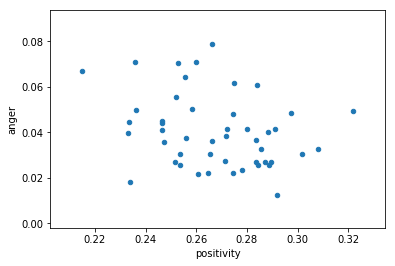

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
gov_df.plot(x='positivity', y='anger', kind='scatter',legend=True)

In [121]:
##Counting words 

In [129]:
vec = CountVectorizer(stop_words='english')
matrix = vec.fit_transform(gov_df.Address) 
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results

,00,000,017,020,022,033,05,050,06,073,...,yvette,zach,zammit,zeneca,zero,zika,zip,zone,zones,zoom
0,0,13,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,2,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
8,0,6,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [134]:
vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(gov_df.Address) 
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results

,'05-06,'17-18,'19-20,'d,'em,'ll,'m,'re,'s,'ve,...,…becaus,…but,…cost,…it,…mani,…not,…the,…we,…when,
0,0,0,0,2,0,0,0,0,8,1,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
5,0,0,0,0,0,0,0,0,5,2,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
matrix = vectorizer.fit_transform(gov_df.Address) 
matrix

<47x11654 sparse matrix of type '<class 'numpy.int64'>'
	with 57313 stored elements in Compressed Sparse Row format>

In [124]:
vectorizer.get_feature_names()

['00',
 '000',
 '017',
 '020',
 '022',
 '033',
 '05',
 '050',
 '06',
 '073',
 '09',
 '10',
 '100',
 '1000',
 '1002',
 '100th',
 '101',
 '102',
 '104',
 '105',
 '105th',
 '106',
 '107',
 '108',
 '109',
 '10th',
 '11',
 '110',
 '110th',
 '112',
 '113',
 '114th',
 '115',
 '116',
 '118',
 '119',
 '1199',
 '11th',
 '11thhighest',
 '12',
 '120',
 '123',
 '125',
 '127',
 '127th',
 '128',
 '128th',
 '129',
 '12th',
 '13',
 '130',
 '132',
 '132nd',
 '133',
 '135',
 '136th',
 '137',
 '139',
 '13th',
 '14',
 '140',
 '145',
 '147',
 '149',
 '149th',
 '14th',
 '15',
 '150',
 '1500',
 '150th',
 '153',
 '153rd',
 '154',
 '155th',
 '158',
 '159',
 '15th',
 '16',
 '160',
 '161',
 '165',
 '167',
 '168',
 '17',
 '170',
 '172',
 '17th',
 '18',
 '180',
 '1800s',
 '1848',
 '185',
 '1852',
 '1859',
 '1864',
 '1866',
 '1868',
 '188',
 '1889',
 '1890',
 '1898',
 '18th',
 '19',
 '192',
 '1923',
 '1928',
 '1935',
 '1936',
 '1937',
 '1940',
 '1941',
 '1942',
 '1944',
 '1947',
 '1959',
 '1960s',
 '1961',
 '1963',


In [84]:
##Let's vectorize all of the speeches 

In [85]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob


def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

from sklearn.feature_extraction import stop_words
custom_stopwords = ['ve', 'said', 'll', 'percent', '10', '12'] + list(stop_words.ENGLISH_STOP_WORDS)

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(stop_words=custom_stopwords,
                      max_df = 0.9, #if you are in more than 90%, ignore
                      min_df = 0.15, #if you are only in 15% of the time, ignore
                      max_features = 200,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(gov_df['Address'])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 228 ms, sys: 3.06 ms, total: 231 ms
Wall time: 233 ms


In [114]:
results.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [90]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 4 clusters usinga  (47, 200) matrix
CPU times: user 198 ms, sys: 4.71 ms, total: 203 ms
Wall time: 200 ms


In [92]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :4]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: students health economic energy
Cluster 1: north addiction tonight world
Cluster 2: going kids got south
Cluster 3: income fiscal taxes pay


In [102]:
gov_df['category'] = km.labels_
gov_df

,Address,State,Year,category
0,"President Pete Kelly, Speaker Bryce Edgmon, Li...",stateofthestate/alaska2017.txt,2017,3
1,"Chief Justice Bales, Members of the Legislatur...",stateofthestate/arizona.txt,2017,2
2,"Thank you, and I salute you as well. It is goo...",stateofthestate/arkansas.txt,2017,0
3,Thank you. Thank you for all that energy and e...,stateofthestate/california.txt,2017,0
4,"I couldn’t sleep last night, so I thought abou...",stateofthestate/colorado.txt,2017,0
5,"Mr. President, Mr. Speaker, Lt. Governor Wyman...",stateofthestate/connecticut.txt,2017,3
6,"Lt. Governor Hall-Long, Mister President Pro T...",stateofthestate/delaware.txt,2017,3
7,"Good morning President Negron, Speaker Corcora...",stateofthestate/florida.txt,2017,2
8,"Lt. Gov. Cagle, Speaker Ralston, President Pro...",stateofthestate/georgia.txt,2017,0
9,"Mister Speaker, President Kouchi, former gover...",stateofthestate/hawaii.txt,2017,0


In [70]:
###counting words and such 

In [ ]:
#stemming everything 

In [93]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer() 

In [94]:
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [95]:
##TF 

In [101]:
vec = TfidfVectorizer(stop_words='english', 
                      tokenizer=stemming_tokenizer,
                      use_idf=True
                     )

matrix = vec.fit_transform(gov_df.Address) 
results3 = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results3

,-,--,---,-----,--a,-and,-truth,0,00,000,...,zach,zammit,zeneca,zero,zero-bas,zero-interest,zika,zip,zone,zoom
0,0.005222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034433,...,0.000000,0.000000,0.000000,0.015324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012816,...,0.000000,0.016766,0.000000,0.012357,0.000000,0.000000,0.000000,0.010730,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.412809,0.000000,0.000000,0.000000,0.000000,0.000000,0.043255,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016066,0.000000,0.044169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032463,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013590,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.025538,0.000000,0.000000,0.000000,0.000000,0.016345,0.042603,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035008,0.011203,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
